In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [3]:
data = pd.read_csv('Pak_vs_Ind.csv')
data.head()

,match_no,date,venue,batting_team,bowling_team,innings,Over_No,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,Total_Runs,wicket_type,player_dismissed,fielder
0,19,9-Jun-24,"Nassau County International Cricket Stadium, N...",IND,PAK,1,1,0.1,Rohit,Shaheen Afridi,2,0,0,0,0,0,2,NaN,NaN,NaN
1,19,9-Jun-24,"Nassau County International Cricket Stadium, N...",IND,PAK,1,1,0.2,Rohit,Shaheen Afridi,0,0,0,0,0,0,0,NaN,NaN,NaN
2,19,9-Jun-24,"Nassau County International Cricket Stadium, N...",IND,PAK,1,1,0.3,Rohit,Shaheen Afridi,6,0,0,0,0,0,6,NaN,NaN,NaN
3,19,9-Jun-24,"Nassau County International Cricket Stadium, N...",IND,PAK,1,1,0.4,Rohit,Shaheen Afridi,0,0,0,0,0,0,0,NaN,NaN,NaN
4,19,9-Jun-24,"Nassau County International Cricket Stadium, N...",IND,PAK,1,1,0.5,Rohit,Shaheen Afridi,0,0,0,0,0,0,0,NaN,NaN,NaN


   batting_team  Over_No  Total_Runs
0           IND        1           8
1           IND        2          12
2           IND        3           2
3           IND        4           4
4           IND        5          14
5           IND        6          12
6           IND        7           8
7           IND        8           5
8           IND        9           7
9           IND       10          13
10          IND       11           8
11          IND       12           1
12          IND       13           5
13          IND       14           3
14          IND       15           1
15          IND       16           3
16          IND       17           6
17          IND       18           7
18          IND       19           6
19          PAK        1          10
20          PAK        2           6
21          PAK        3           4
22          PAK        4           3
23          PAK        5           5
24          PAK        6          10
25          PAK        7           3
2

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


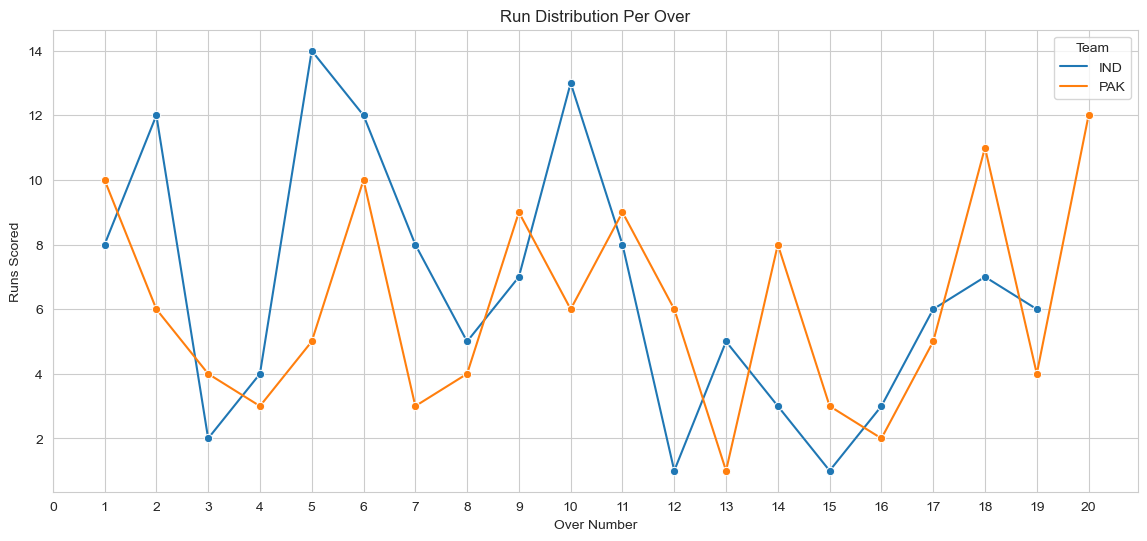

In [4]:
sns.set_style("whitegrid")
# data preparation for run distribution per over
run_distribution = data.groupby(['batting_team', 'Over_No']).agg({'Total_Runs': 'sum'}).reset_index()
print(run_distribution)
# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='Over_No', y='Total_Runs', hue='batting_team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()


   batting_team           striker  runs_of_bat
6           IND              Pant           42
16          PAK            Rizwan           31
1           IND              Axar           20
14          PAK        Imad Wasim           15
19          PAK        Usman Khan           13
12          PAK      Fakhar Zaman           13
7           IND             Rohit           13
11          PAK        Babar Azam           13
15          PAK       Naseem Shah           10
0           IND    Arshdeep Singh            9
9           IND             Siraj            7
3           IND     Hardik Pandya            7
10          IND  Suryakumar Yadav            7
13          PAK    Iftikhar Ahmed            5
5           IND             Kohli            4
17          PAK       Shadab Khan            4
8           IND       Shivam Dube            3
4           IND            Jadeja            0
2           IND            Bumrah            0
18          PAK    Shaheen Afridi            0


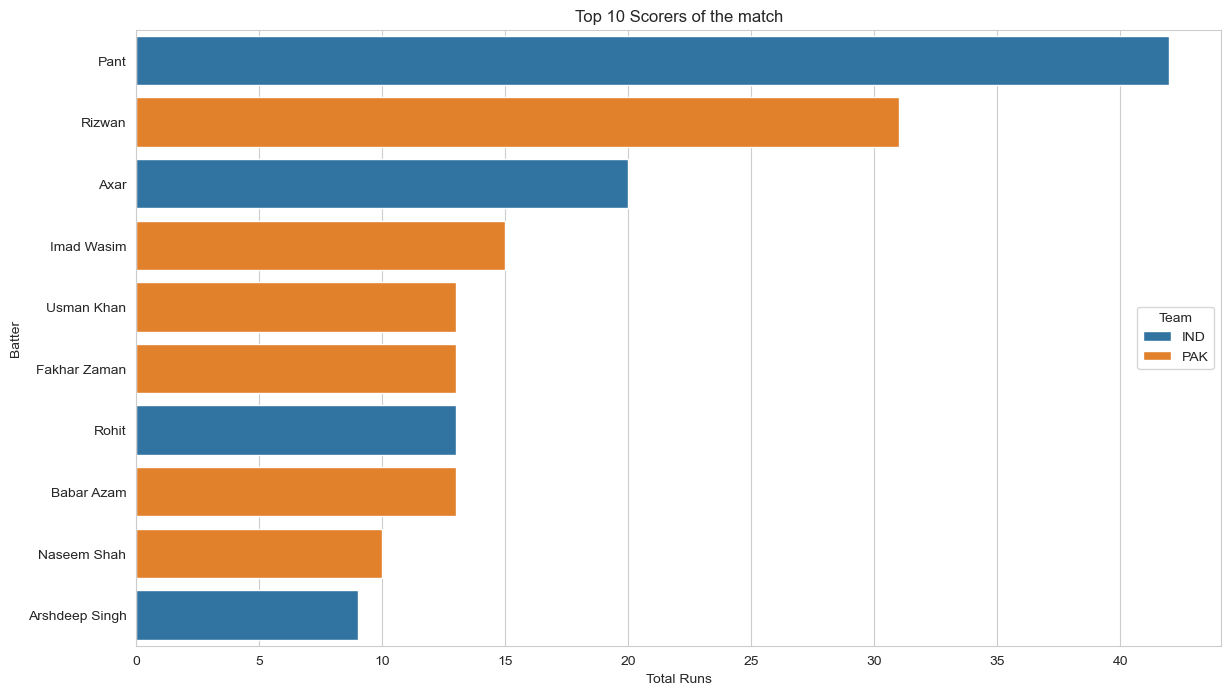

In [18]:
# calculating top scorers for each team
top_scorers = data.groupby(['batting_team', 'striker']).agg({'runs_of_bat': 'sum'}).reset_index().sort_values(by='runs_of_bat', ascending=False)
top_10_scorers = top_scorers.head(10)
print(top_scorers)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_scorers, x='runs_of_bat', y='striker', hue='batting_team', dodge=False)
plt.title('Top 10 Scorers of the match')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

wicket_type
caught    13
bowled     2
runout     1
lbw        1
Name: count, dtype: int64


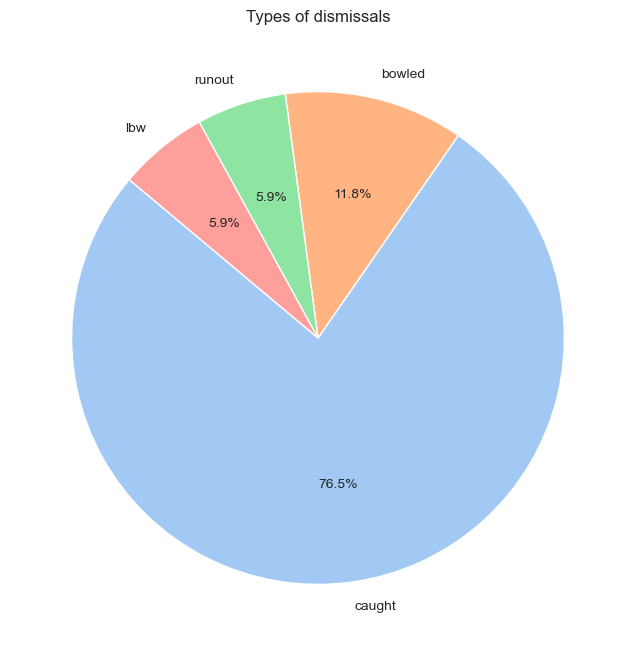

In [10]:
# counting dismissal types
dismissal_types = data['wicket_type'].dropna().value_counts()
print(dismissal_types)
plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Types of dismissals')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


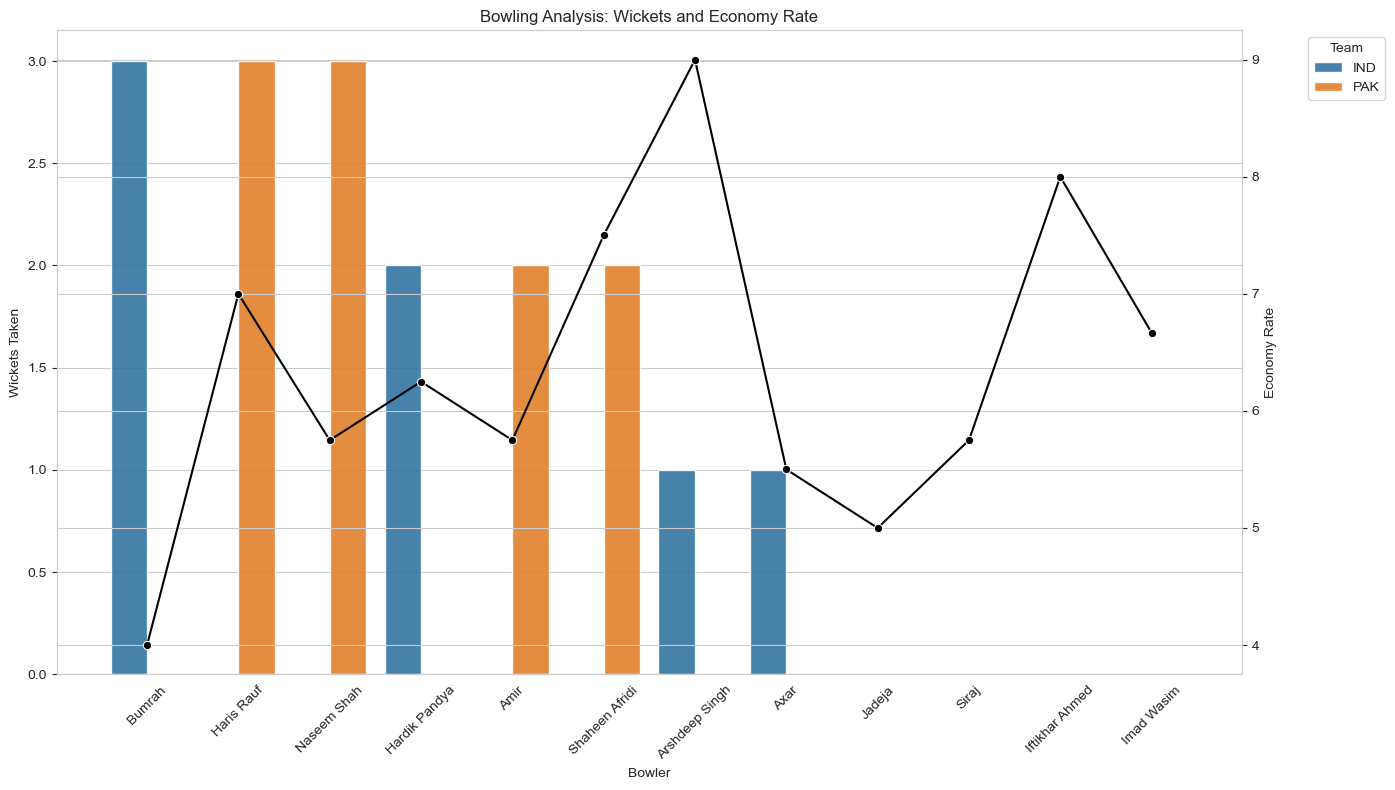

In [7]:
# preparing data for bowling analysis
data['wickets_taken'] = data['wicket_type'].notna().astype(int)
bowling_stats = data.groupby(['bowling_team', 'bowler']).agg({'Total_Runs': 'sum', 'wickets_taken': 'sum', 'Over_No': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['Total_Runs'] / bowling_stats['Over_No']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)


# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='bowling_team', ax=ax1, alpha=0.9)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

In [41]:
print(bowling_stats) 


   batting_team          bowler  Total_Runs  wickets_taken  Over_No  \
0           IND            Amir          23              2        4   
1           IND      Haris Rauf          21              3        3   
2           IND  Iftikhar Ahmed           8              0        1   
3           IND      Imad Wasim          20              0        3   
4           IND     Naseem Shah          23              3        4   
5           IND  Shaheen Afridi          30              2        4   
6           PAK  Arshdeep Singh          36              1        4   
7           PAK            Axar          11              1        2   
8           PAK          Bumrah          16              3        4   
9           PAK   Hardik Pandya          25              2        4   
10          PAK          Jadeja          10              0        2   
11          PAK           Siraj          23              0        4   

    economy_rate  
0       5.750000  
1       7.000000  
2       8.000000  


     match_no      date                                              venue  \
0          19  9-Jun-24  Nassau County International Cricket Stadium, N...   
1          19  9-Jun-24  Nassau County International Cricket Stadium, N...   
2          19  9-Jun-24  Nassau County International Cricket Stadium, N...   
3          19  9-Jun-24  Nassau County International Cricket Stadium, N...   
4          19  9-Jun-24  Nassau County International Cricket Stadium, N...   
..        ...       ...                                                ...   
238        19  9-Jun-24  Nassau County International Cricket Stadium, N...   
239        19  9-Jun-24  Nassau County International Cricket Stadium, N...   
240        19  9-Jun-24  Nassau County International Cricket Stadium, N...   
241        19  9-Jun-24  Nassau County International Cricket Stadium, N...   
242        19  9-Jun-24  Nassau County International Cricket Stadium, N...   

    batting_team bowling_team  innings  Over_No  over         s

C:\Users\Pc Planet\AppData\Local\Temp\ipykernel_2728\3254083269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_deliveries['over_ball'] = pak_deliveries['Over_No'] + (pak_deliveries.groupby('Over_No').cumcount()+1) / 6
C:\Users\Pc Planet\AppData\Local\Temp\ipykernel_2728\3254083269.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_deliveries['over_ball'] = ind_deliveries['Over_No'] + (ind_deliveries.groupby('Over_No').cumcount() +1 )  / 6


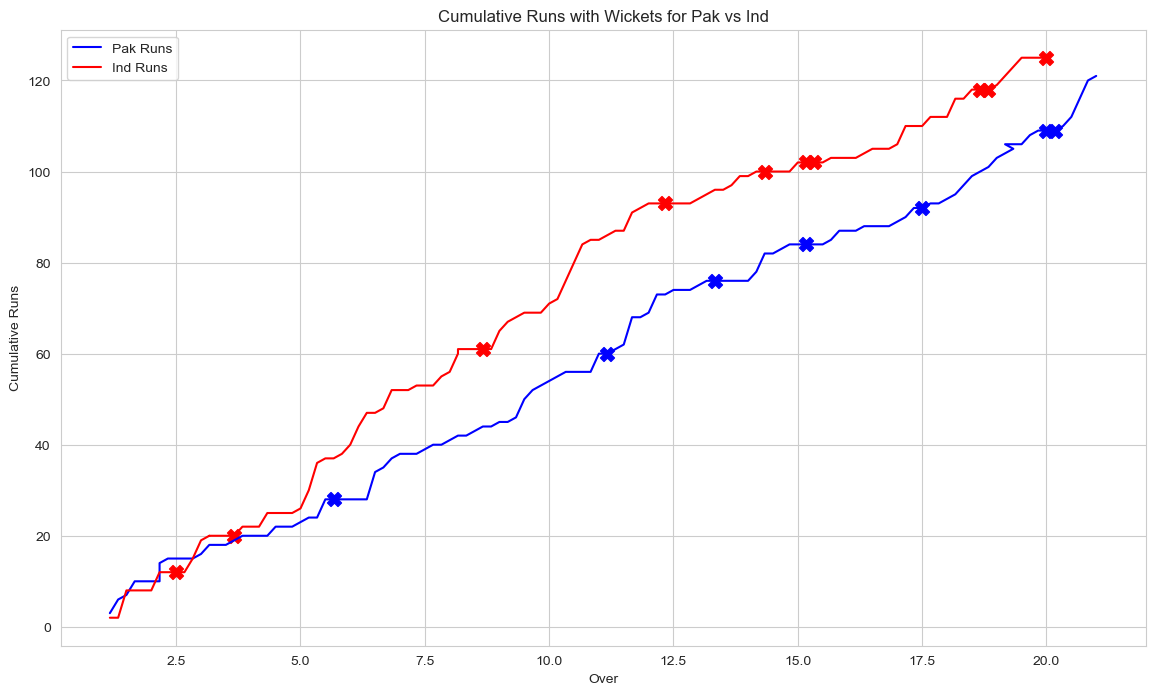

In [14]:
# calculate cumulative runs and wickets for each ball for both teams
data['cumulative_runs'] = data.groupby('batting_team')['Total_Runs'].cumsum()
data['cumulative_wickets'] = data.groupby('bowling_team')['wickets_taken'].cumsum()
print(data)
# separate data for both teams
pak_deliveries = data[data['batting_team'] == 'PAK']
ind_deliveries = data[data['batting_team'] == 'IND']
print(pak_deliveries)

# calculating overs for cumulative analysis
pak_deliveries['over_ball'] = pak_deliveries['Over_No'] + (pak_deliveries.groupby('Over_No').cumcount()+1) / 6
ind_deliveries['over_ball'] = ind_deliveries['Over_No'] + (ind_deliveries.groupby('Over_No').cumcount() +1 )  / 6

print(pak_deliveries)
# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for RCB
ax.plot(pak_deliveries['over_ball'], pak_deliveries['cumulative_runs'], color='blue', label='Pak Runs')
ax.scatter(pak_deliveries[pak_deliveries['wickets_taken'] == 1]['over_ball'], pak_deliveries[pak_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

# plot for DC
ax.plot(ind_deliveries['over_ball'], ind_deliveries['cumulative_runs'], color='red', label='Ind Runs')
ax.scatter(ind_deliveries[ind_deliveries['wickets_taken'] == 1]['over_ball'],ind_deliveries[ind_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for Pak vs Ind')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()